<a href="https://colab.research.google.com/github/selvimaharanip/bi-analyst-portfolio/blob/main/bootcamp-projects/eda-statistics/eda_statistics_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA) and Statistics

Exploratory Data Analysis (EDA) and statistics play a fundamental role in data analysis by helping analysts understand the structure, patterns, and characteristics of a dataset before applying advanced modeling techniques.

EDA enables the identification of data distributions, trends, relationships, anomalies, and potential data quality issues through summary statistics and visualizations, while statistical analysis provides quantitative methods to measure variability, test hypotheses, and assess the significance of observed patterns.

Together, EDA and statistics support informed decision-making by transforming raw data into meaningful insights, validating assumptions, reducing analytical risk, and ensuring that subsequent analyses and models are built on a solid and well-understood data foundation.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In every task involving data analysis, the first step that must be performed after importing the libraries and dataset is to familiarize ourselves with the data.

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/Bootcamp/Sample data/transactions.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             641914 non-null  int64  
 1   customerId                641914 non-null  int64  
 2   creditLimit               641914 non-null  int64  
 3   availableMoney            641914 non-null  float64
 4   transactionDateTime       641914 non-null  object 
 5   transactionAmount         641914 non-null  float64
 6   merchantName              641914 non-null  object 
 7   acqCountry                638001 non-null  object 
 8   merchantCountryCode       641290 non-null  object 
 9   posEntryMode              638569 non-null  float64
 10  posConditionCode          641627 non-null  float64
 11  merchantCategoryCode      641914 non-null  object 
 12  currentExpDate            641914 non-null  object 
 13  accountOpenDate           641914 non-null  o

## Statistical Description

In [ ]:
df.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,6.419140e+05,6.419140e+05,641914.000000,641914.000000,641914.000000,638569.000000,641627.000000,641914.000000,641914.000000,641914.000000,641914.000000
mean,5.547701e+08,5.547701e+08,10697.210608,6652.828573,135.162497,9.136460,3.238367,557.199927,556.775160,4886.184043,4044.382035
std,2.546884e+08,2.546884e+08,11460.359133,9227.132275,147.053302,16.961185,9.680862,257.326204,257.402639,2859.053679,5945.510224
min,1.005471e+08,1.005471e+08,250.000000,-1244.930000,0.000000,2.000000,1.000000,100.000000,1.000000,0.000000,0.000000
25%,3.223192e+08,3.223192e+08,5000.000000,1114.970000,32.320000,2.000000,1.000000,334.000000,333.000000,2364.000000,502.442500
50%,5.438879e+08,5.438879e+08,7500.000000,3578.165000,85.800000,5.000000,1.000000,581.000000,580.000000,4873.000000,2151.860000
75%,7.862277e+08,7.862277e+08,15000.000000,8169.185000,189.030000,9.000000,1.000000,762.000000,761.000000,7267.000000,5005.890000
max,9.999853e+08,9.999853e+08,50000.000000,50000.000000,1825.250000,90.000000,99.000000,998.000000,998.000000,9998.000000,47496.500000


In [ ]:
df.describe(include=object)

,transactionDateTime,merchantName,acqCountry,merchantCountryCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,transactionType
count,641914,641914,638001,641290,641914,641914,641914,641914,641325
unique,635472,2493,4,4,19,165,1826,2186,3
top,2016-01-19T04:26:56,Lyft,US,US,online_retail,1/5/2026,11/12/2015,20/7/2016,PURCHASE
freq,3,25311,632303,635577,161469,4209,10137,3948,608685


In [ ]:
df.head(10)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08T19:04:50,111.33,Lyft,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,True,0.00,False,False
1,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,9.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,111.33,False,False
2,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.40,Lyft,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,136.08,False,False
3,733493772,733493772,5000,4676.52,2016-01-11T22:47:46,227.34,Lyft,US,US,2.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,True,323.48,False,False
4,733493772,733493772,5000,4449.18,2016-01-16T01:41:11,0.00,Lyft,US,US,2.0,...,3/8/2014,3/8/2014,492,492,9184,ADDRESS_VERIFICATION,False,550.82,False,False
5,733493772,733493772,5000,4449.18,2016-01-16T21:35:27,9.80,Fresh eCards,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,550.82,False,False
6,733493772,733493772,5000,4439.38,2016-01-24T07:54:01,247.99,Uber,NaN,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,560.62,False,False
7,733493772,733493772,5000,4191.39,2016-01-26T05:28:24,0.00,Universe Massage #95463,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,ADDRESS_VERIFICATION,False,808.61,False,False
8,733493772,733493772,5000,4191.39,2016-01-26T12:18:14,11.54,Universe Massage #70014,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,808.61,True,False
9,733493772,733493772,5000,4179.85,2016-01-26T12:19:15,11.54,Universe Massage #70014,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,REVERSAL,False,820.15,True,False


# Univariate Exploration

Perform univariate exploration on the variables contained in the dataset to understand the data distribution. The exploration can be conducted gradually based on data types.

## Exploration of String Data Types

### transactionType

The transactionType variable contains information about the types of transactions performed. This exploration aims to observe the distribution of transaction counts across each category.

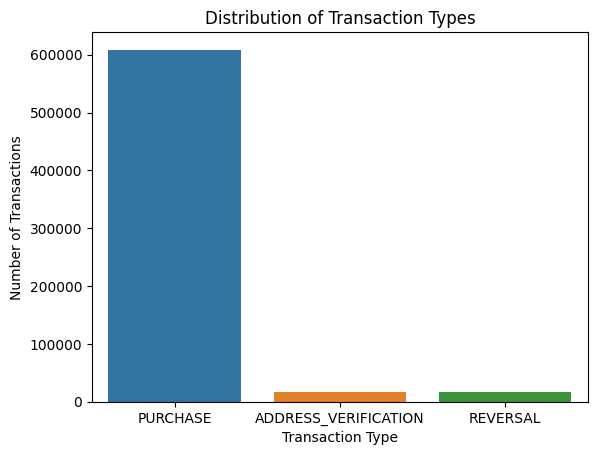

In [ ]:
sns.barplot(df.transactionType.value_counts().reset_index(), x="transactionType", y="count", hue="transactionType")
plt.title("Distribution of Transaction Types")
plt.xlabel("Transaction Type")
plt.ylabel("Number of Transactions")
plt.show()

From the chart, it can be concluded that the most frequent transaction type is purchase.

### transactionDateTime

The transactionDateTime variable contains information related to the time when transactions occurred. This exploration aims to examine the distribution of transaction counts over time.

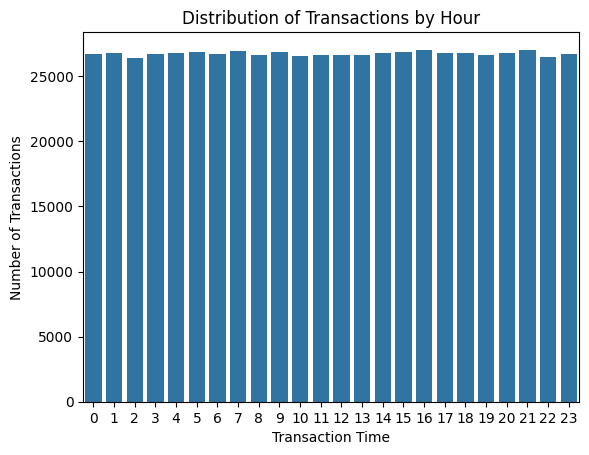

In [ ]:
# Since the transactionDateTime variable is of string type, convert it to datetime format first
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])

df['hour'] = df['transactionDateTime'].dt.hour
sns.countplot(data=df, x='hour')
plt.title("Distribution of Transactions by Hour")
plt.xlabel("Transaction Time")
plt.ylabel("Number of Transactions")
plt.show()

From the chart, it can be concluded that the hourly transaction distribution tends to be relatively even.

### cardPresent

The cardPresent variable contains information regarding whether a physical card was used during the transaction. This exploration aims to compare transactions conducted using physical cards versus non-physical cards.

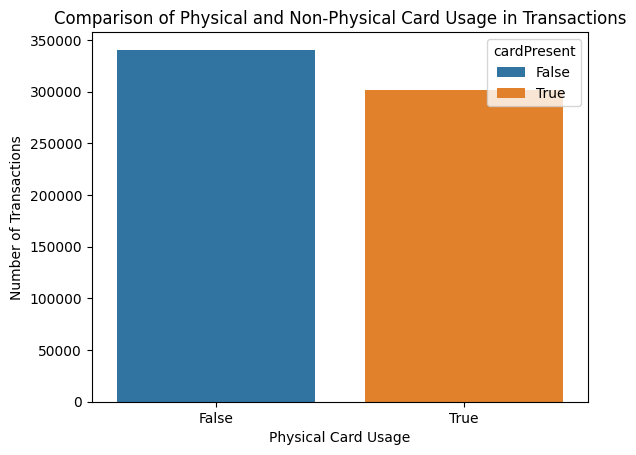

In [ ]:
sns.barplot(df.cardPresent.value_counts().reset_index(), x="cardPresent", y="count", hue="cardPresent")
plt.title("Comparison of Physical and Non-Physical Card Usage in Transactions")
plt.xlabel("Physical Card Usage")
plt.ylabel("Number of Transactions")
plt.show()

From the chart, it can be concluded that more transactions are conducted without a physical card.

### merchantName

The merchantName variable contains information about the names of merchants involved in transactions. This exploration is conducted to identify the merchants where transactions most frequently occur.

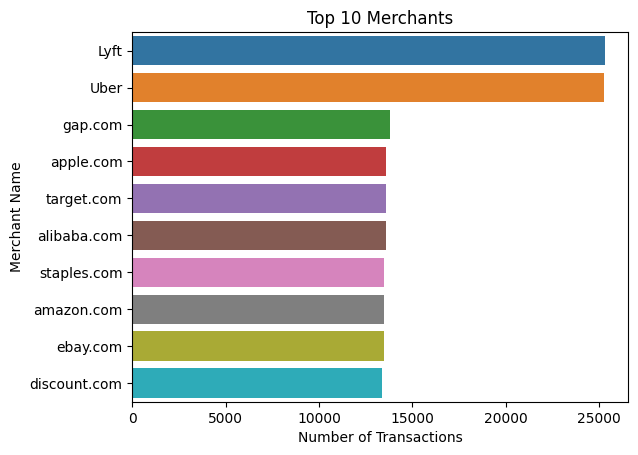

In [ ]:
sns.barplot(df.merchantName.value_counts().head(10).reset_index(), x="count", y="merchantName", hue="merchantName")
plt.title("Top 10 Merchants")
plt.xlabel("Number of Transactions")
plt.ylabel("Merchant Name")
plt.show()

From the chart, it can be concluded that among the top 10 most frequent merchants, the top two are Lyft and Uber.

### merchantCategoryCode

The merchantCategoryCode variable contains information about the business category of merchants involved in transactions. This exploration aims to identify the types of businesses where transactions occur.

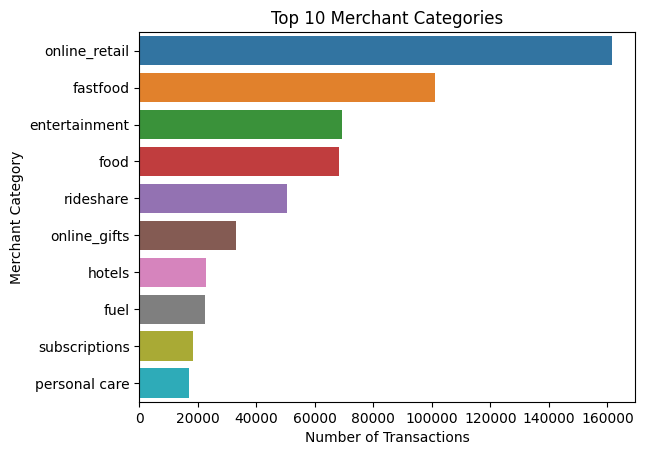

In [ ]:
sns.barplot(df.merchantCategoryCode.value_counts().head(10).reset_index(), x="count", y="merchantCategoryCode", hue="merchantCategoryCode")
plt.title("Top 10 Merchant Categories")
plt.xlabel("Number of Transactions")
plt.ylabel("Merchant Category")
plt.show()

From the chart, it can be concluded that among the top 10 merchant categories, the two most frequent categories are online retail and fast food.

### merchantCountryCode

The merchantCountryCode variable contains information about the country code indicating the merchant’s location or country of origin.

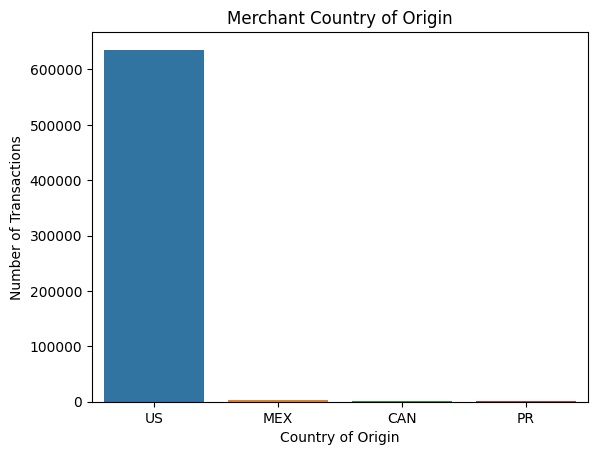

In [ ]:
sns.barplot(df.merchantCountryCode.value_counts().reset_index(), x="merchantCountryCode", y="count", hue="merchantCountryCode")
plt.title("Merchant Country of Origin")
plt.xlabel("Country of Origin")
plt.ylabel("Number of Transactions")
plt.show()

From the chart, it can be concluded that most transactions originate from merchants based in the country with the code US.

### acqCountry

The acqCountry variable contains information about the country where the transaction acquirer is located.

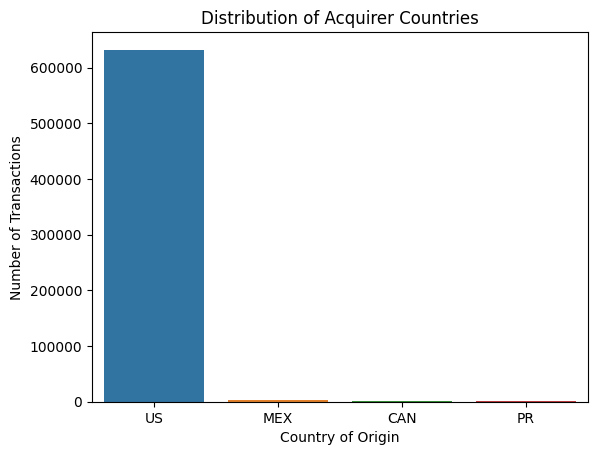

In [ ]:
sns.barplot(df.acqCountry.value_counts().reset_index(), x="acqCountry", y="count", hue="acqCountry")
plt.title("Distribution of Acquirer Countries")
plt.xlabel("Country of Origin")
plt.ylabel("Number of Transactions")
plt.show()

From the chart, it can be concluded that the largest acquiring country is the US.

In [ ]:
df.acqCountry.describe()

,acqCountry
count,638001
unique,4
top,US
freq,632303


The acqCountry variable is heavily dominated by transactions originating from the US. With a frequency of 632,303 transactions, the US is the most dominant acquirer country in the dataset.

### isFraud

The isFraud variable contains information regarding whether a transaction is classified as fraud or non-fraud. This exploration is conducted to observe the distribution of fraudulent versus non-fraudulent transactions.

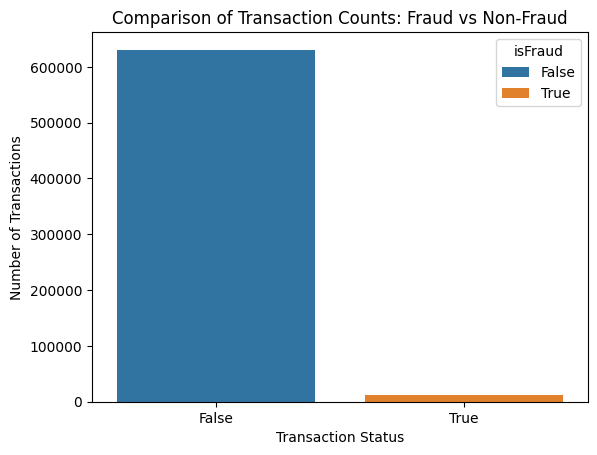

In [ ]:
# Count the number of transactions by fraud status
fraud_count = df.isFraud.value_counts().reset_index()
fraud_count.columns = ["isFraud", "count"]

sns.barplot(data=fraud_count, x="isFraud", y="count", hue="isFraud")
plt.title("Comparison of Transaction Counts: Fraud vs Non-Fraud")
plt.xlabel("Transaction Status")
plt.ylabel("Number of Transactions")
plt.show()

From the chart, it can be concluded that fraudulent transactions occur far less frequently than non-fraudulent transactions.

## Exploration of Numeric Data Types

### creditLimit

The creditLimit variable contains information about customers’ credit card limits. This exploration aims to observe the distribution of credit limits among customers.

Text(0, 0.5, 'Density')

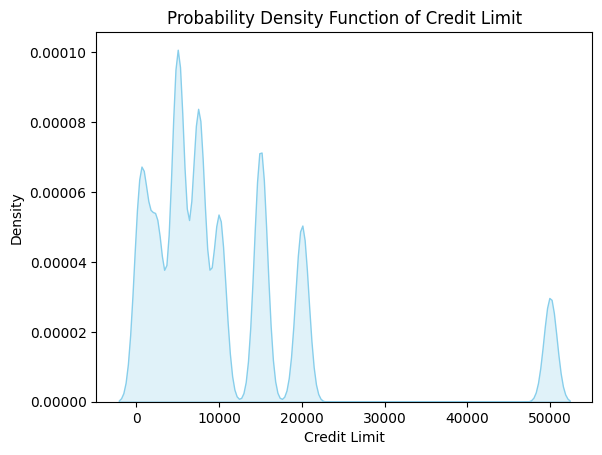

In [ ]:
sns.kdeplot(df.creditLimit, fill=True, color="skyblue")
plt.title("Probability Density Function of Credit Limit")
plt.xlabel("Credit Limit")
plt.ylabel("Density")

In [ ]:
print("Skewness: ", df.creditLimit.skew())

Skewness:  2.294548813378859


Most customers have credit limits in the range of 0–30,000, while only a small number fall within the 40,000–50,000 range. A skewness value of 2.29 confirms that the distribution is strongly right-skewed, indicating that most customers have relatively low credit limits, with only a few having very high limits.

### availableMoney

The availableMoney variable contains information about the amount of money available on the credit card before accounting for pending transactions.

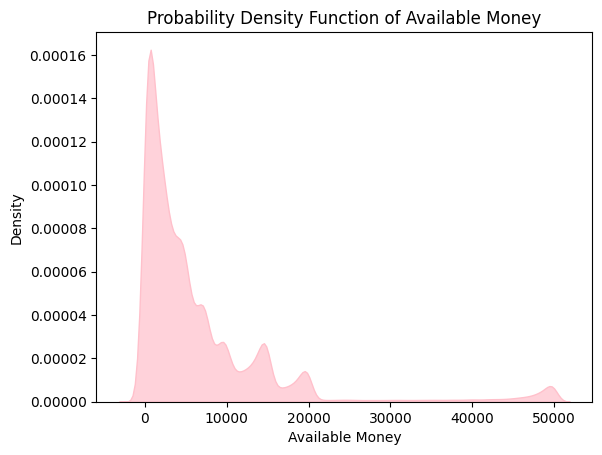

In [ ]:
sns.kdeplot(df.availableMoney, fill=True, color="pink", alpha=0.7)
plt.title("Probability Density Function of Available Money")
plt.xlabel("Available Money")
plt.ylabel("Density")
plt.show()

In [ ]:
print("Skewness: ", df.availableMoney.skew())

Skewness:  2.888834824892849


With a skewness value of 2.8888, the distribution of available money is highly right-skewed. This indicates that most customers have relatively small available funds (0–10,000), while a small number of customers have significantly larger available funds (40,000–50,000), creating a long right tail in the distribution.

### transactionAmount

The transactionAmount variable contains information about the transaction amounts made by customers.

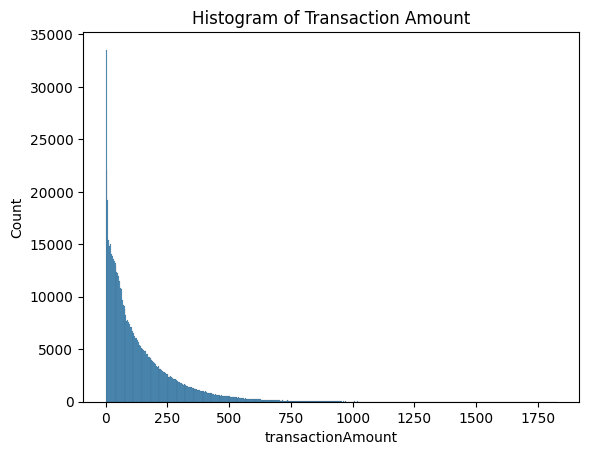

In [ ]:
sns.histplot(df.transactionAmount)
plt.title("Histogram of Transaction Amount")
plt.show()

In [ ]:
print("Skewness: ", df.transactionAmount.skew())

Skewness:  2.09571515354587


With a skewness value of 2.0957, the transaction amount distribution is right-skewed, indicating that most transactions are of relatively small amounts (0–750).

### currentBalance

The currentBalance variable contains information about the current credit card balance (current billing or credit card usage).

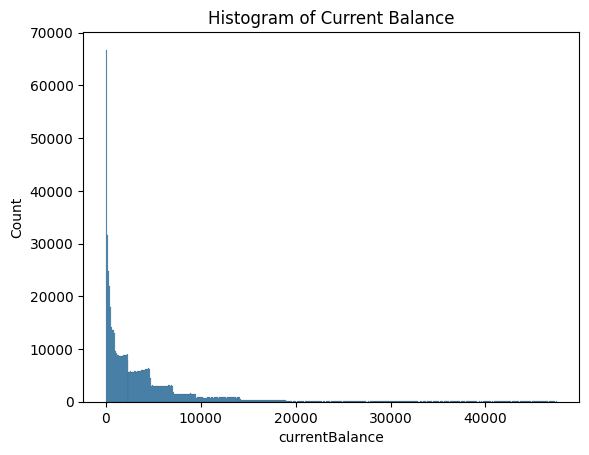

In [ ]:
sns.histplot(df.currentBalance)
plt.title("Histogram of Current Balance")
plt.show()

In [ ]:
print("Skewness: ", df.currentBalance.skew())

Skewness:  3.600021657637472


With a skewness value of 3.6000, the distribution of current balance is highly right-skewed. This indicates that most customers use their credit cards for small to moderate amounts (0–10,000), while only a small number of customers have very high utilized balances (above 10,000).

# Bivariate Exploration

### Is there a difference in the number of fraud incidents between transactions conducted with physical cards and transactions without physical cards?

The purpose of this analysis is to compare the number of fraud incidents between card-present and card-not-present transactions in order to identify whether one transaction type carries a higher fraud risk.

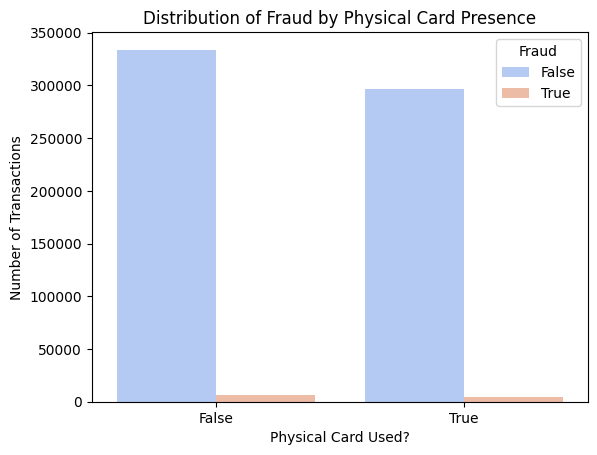

In [ ]:
sns.countplot(data=df, x='cardPresent', hue='isFraud', palette='coolwarm')
plt.title('Distribution of Fraud by Physical Card Presence')
plt.xlabel('Physical Card Used?')
plt.ylabel('Number of Transactions')
plt.legend(title='Fraud')
plt.show()

In [ ]:
# Calculate the number of fraud & non-fraud transactions per cardPresent group
count_table = df.groupby('cardPresent')['isFraud'].value_counts().unstack()

# Calculate percentages
percentage_table = count_table.div(count_table.sum(axis=1), axis=0) * 100

print("Number of Fraud & Non-Fraud Transactions:")
print(count_table)
print("\nPercentage of Fraud & Non-Fraud (%):")
print(percentage_table.round(2))

Number of Fraud & Non-Fraud Transactions:
isFraud       False  True 
cardPresent               
False        333829   6624
True         296783   4678

Percentage of Fraud & Non-Fraud (%):
isFraud      False  True 
cardPresent              
False        98.05   1.95
True         98.45   1.55


Based on the calculated counts and percentages of fraud for card-present and card-not-present transactions, the following findings were obtained:

1. The number of fraudulent transactions is higher for card-not-present transactions (6,624 cases) compared to card-present transactions (4,678 cases).
2. In terms of percentage, the fraud rate for:
Card-not-present transactions = 1.95%
Card-present transactions = 1.55%
3. This indicates that card-not-present transactions have a higher fraud rate.
4. Fraud risk increases by approximately 0.40 percentage points in non-physical card transactions.

### How does the number of transactions compare between fraud and non-fraud cases?

This analysis is conducted to examine whether transaction amounts are associated with fraud occurrence.

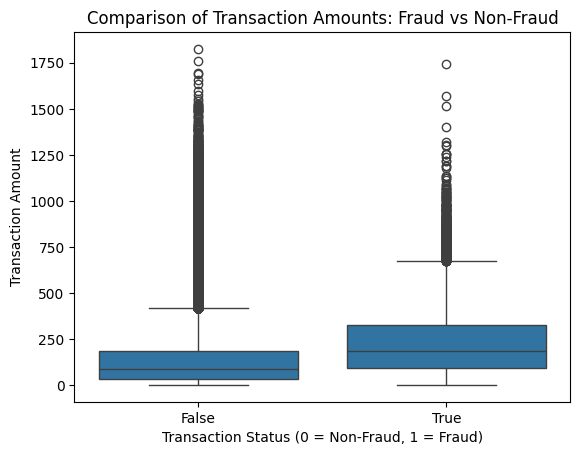

In [ ]:
sns.boxplot(data=df, x="isFraud", y="transactionAmount")
plt.title("Comparison of Transaction Amounts: Fraud vs Non-Fraud")
plt.xlabel("Transaction Status (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Transaction Amount")
plt.show()

In [ ]:
# Calculate the number of Fraud & Non-Fraud transactions
count_fraud = df['isFraud'].value_counts()

# Create a count DataFrame
count_df = pd.DataFrame({
    "isFraud": count_fraud.index,
    "count": count_fraud.values
})

# Calculate percentages
count_df["percentage"] = (count_df["count"] / count_df["count"].sum()) * 100

# Display results
print("Number of Fraud & Non-Fraud Transactions:")
print(count_df)

Number of Fraud & Non-Fraud Transactions:
   isFraud   count  percentage
0    False  630612   98.239328
1     True   11302    1.760672


Based on the results, non-fraud transactions significantly outnumber fraudulent transactions. Out of all transactions, 630,612 transactions (98.24%) are classified as non-fraud, while only 11,302 transactions (1.76%) are recorded as fraud.

This indicates that fraud incidents in this dataset are relatively rare, accounting for less than 2% of all transactions.

# Hypothesis Testing

Before conducting hypothesis testing using a Z-test (proportion test), first calculate the number of fraud cases and total transactions per category, then apply the statistical test.

In [ ]:
fraud_card_present = df[df.cardPresent == True]["isFraud"].sum()
fraud_card_not_present = df[df.cardPresent == False]["isFraud"].sum()

n_card_present = df[df.cardPresent == True].shape[0]
n_card_not_present = df[df.cardPresent == False].shape[0]

count = np.array([fraud_card_present, fraud_card_not_present])
nobs = np.array([n_card_present, n_card_not_present])

## One-Tailed Hypothesis Test

H₀ (Null Hypothesis): The proportion of fraud in card-present transactions is equal to that in card-not-present transactions.

H₁ (Alternative Hypothesis): The proportion of fraud in card-present transactions is greater than that in card-not-present transactions.

In [ ]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

# One-tailed proportion test (greater)
z_statistic, p_value = proportions_ztest(count, nobs, alternative='larger')

alpha = 0.05

if p_value < alpha:
    print("\nDecision: P-value is smaller than alpha. Reject the Null Hypothesis. The proportion of fraud in card-present transactions is greater than in card-not-present transactions.")
else:
    print("\nDecision: P-value is greater than alpha. Fail to reject the Null Hypothesis. The proportion of fraud in card-present transactions is equal to or smaller than in card-not-present transactions.")


Decision: P-value is greater than alpha. Fail to reject the Null Hypothesis. The proportion of fraud in card-present transactions is equal to or smaller than in card-not-present transactions.


## Two-Tailed Hypothesis Test

H₀ (Null Hypothesis): The proportion of fraud in card-present transactions is equal to that in card-not-present transactions.

H₁ (Alternative Hypothesis): The proportion of fraud in card-present transactions is not equal to that in card-not-present transactions.

In [ ]:
# Two-tailed proportion test (two-sided)
z_statistic, p_value = proportions_ztest(count, nobs, alternative='two-sided')

alpha = 0.05

if p_value < alpha:
    print("\nDecision: P-value is smaller than alpha. Reject the Null Hypothesis. The proportion of fraud in card-present transactions is not equal to that in card-not-present transactions.")
else:
    print("\nDecision: P-value is greater than alpha. Fail to reject the Null Hypothesis. The proportion of fraud in card-present transactions is equal to that in card-not-present transactions.")


Decision: P-value is smaller than alpha. Reject the Null Hypothesis. The proportion of fraud in card-present transactions is not equal to that in card-not-present transactions.
